# Visualize GUI annotations
Here, we investigate the enrichment scores obtained in 08_gene_enrichment_scoring_guicells_rbf_8e-1.py that uses the log-normalized data matrix that is log-transformed from the normalized matrix in 06_logc_transformation.py and saved as .h5 files in 07_save_mats_as_h5.py

## 1. Set up the notebook

In [1]:
import os
import gc
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.sparse import csr_matrix
from SEMITONES.enrichment_scoring import sig_interval
from SEMITONES.support_funcs import pairwise_similarities
from SEMITONES.support_funcs import sig_dictionary, load_sparse_h5

In [2]:
os.chdir("../data/processed/")

## 2. Load the data

The UMAP for visualization

In [3]:
UMAP = np.load("greenleaf_scRNA_combined_umap.npy")

Load the reference cells

In [4]:
with open("greenleaf_scRNA_cells_selected_from_gui.txt", "r") as f:
    r_cells = [int(c.strip("\n")) for c in f.readlines()]
f.close()

Load the enrichment scores

In [5]:
ESCORES = pd.read_csv("greenleaf_scRNA_escores_gui_rbf_8e-1.txt", sep="\t",
                      index_col=0)

We do the annotation manually by inspecting top scoreing genes and import that annotations

## 2. Visualize annotations

In [6]:
order = ["HSC", "MPP",
         "CMP", "MEP", "ERYTHROCYTE",
         "GMP", "GP", "BASO",
         "MP", "IMMATURE MONO_CLAS", "MONO_CLAS", "MONO_INT", "MONO_NONCLAS",
         "CLP", "PRE_B", "B_TRANSITIONAL", "B_NAIVE", "B_MEMORY",
         "PLASMABLAST", "PLASMA",
         "CD4_NAIVE", "CD4_MEMORY", "CD4_TH17", "T_REG",
         "CD8_NAIVE", "CD8_MAIT", "CD8_CENTRAL_MEMORY", "CD8_EFFECTOR_MEMORY",
         "CD8_TERM_EFFECT", "NK", "mDC", "pDC"]

In [7]:
A = pd.read_csv("greenleaf_scRNA_gui_rbf_8e1_annotations.csv", sep="\t")

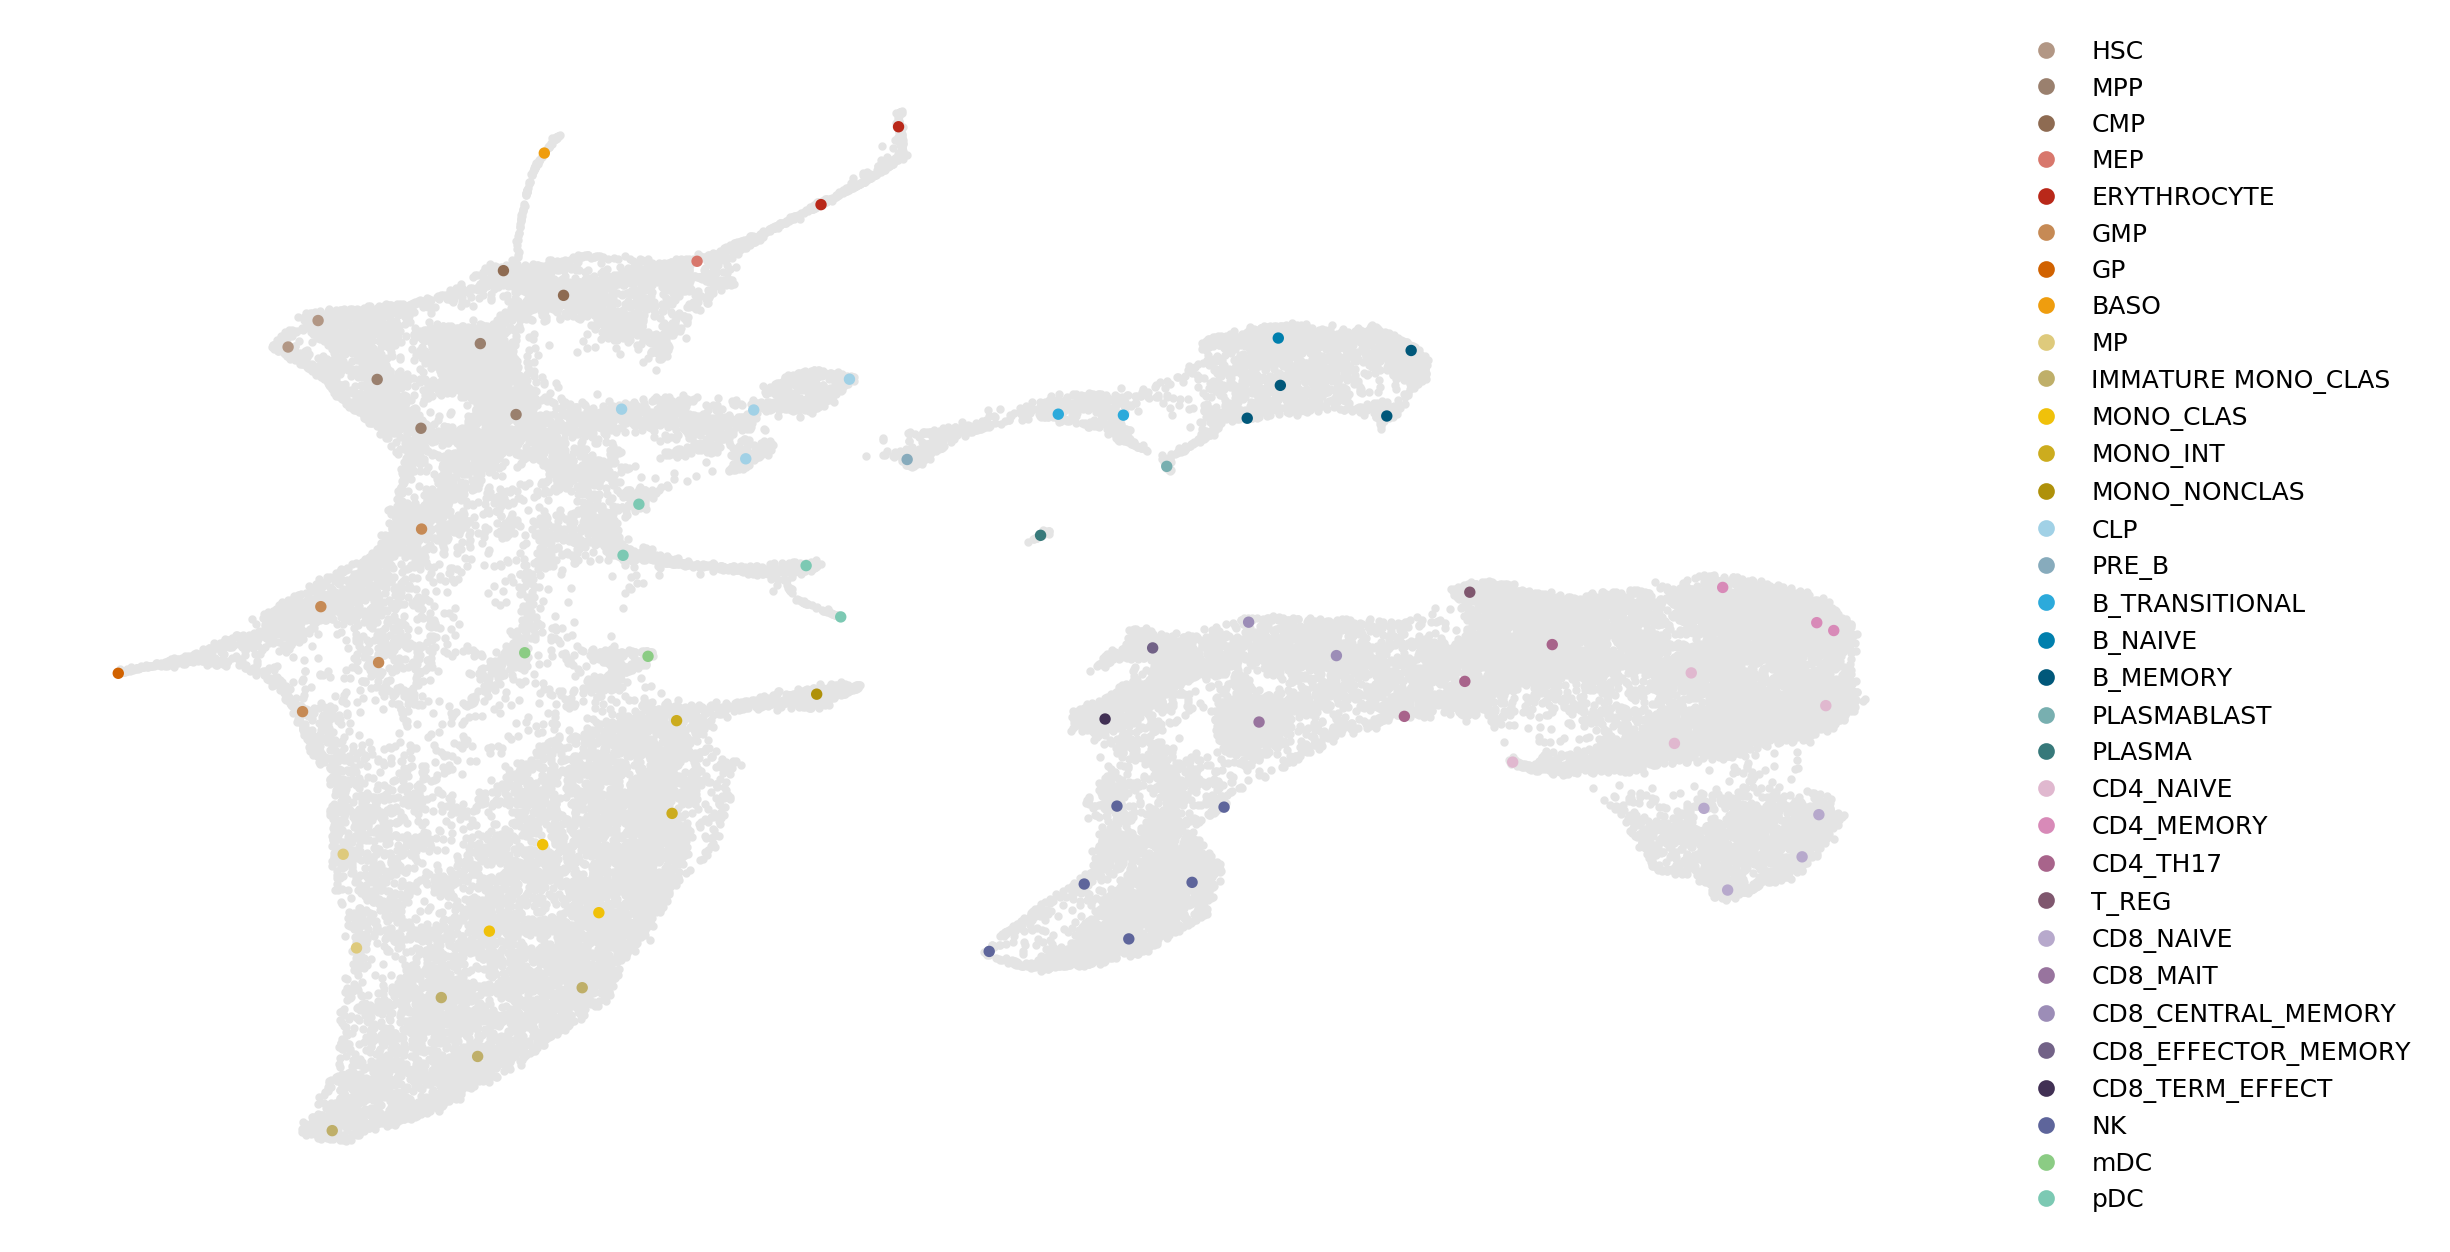

In [8]:
coldict = dict(zip(A.ANNOT, A.COLOUR))
legend = {k: coldict[k] for k in order}
marker = [plt.Line2D([0,0], [0,0], color=c, marker="o", ls="")
          for c in legend.values()]

plt.figure(figsize=(8.27, 5), dpi=300)
plt.scatter(UMAP[:, 0], UMAP[:, 1], color="#e4e4e4", s=1)
plt.scatter(UMAP[A.ID, 0], UMAP[A.ID, 1], c=A.COLOUR.values, s=3)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

leg = plt.legend(marker, legend.keys(), numpoints=1, fontsize=6, ncol=1,
                 markerscale=0.5, loc="center right",
                 bbox_to_anchor=(1.25, 0.5))
leg.get_frame().set_linewidth(0.0)